In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from tqdm import tqdm

# Script

In [23]:
ofname = 'rsrg_gs.txt'
N = 4
Lambdas = np.linspace(0, 3, 100)
iters = 4

In [24]:
for l in tqdm(Lambdas):
    os.system(f'./exercise08 -N {N} -i {iters} -l {l} -o {ofname} -dl 2')

100%|██████████| 100/100 [00:58<00:00,  1.71it/s]


# Read data

In [25]:
data = pd.read_csv(ofname, names=['N', 'iter', 'lambda', 'gs'], delim_whitespace=True)
data['gs_norm'] = data['gs'] / data['N']
data

,N,iter,lambda,gs,gs_norm
0,4,100,0.000000,-4.000000,-1.000000
1,4,100,0.061224,-4.003402,-1.000851
2,4,100,0.122449,-4.013658,-1.003415
3,4,100,0.183673,-4.030858,-1.007715
4,4,100,0.244898,-4.055117,-1.013779
...,...,...,...,...,...
595,4,4,2.878788,-11.855874,-2.963969
596,4,4,2.909091,-11.973478,-2.993370
597,4,4,2.939394,-12.091158,-3.022790
598,4,4,2.969697,-12.208912,-3.052228


In [26]:
def bound(l):
    if(l >= -2 or l <= 2):
        return (-1 -l/4)
    else:
        return (-abs(l))

def bound2(l):
    x = np.linspace(0, 2*np.pi, 1000)
    return (np.min(np.cos(x)**2 + l*np.sin(x)))


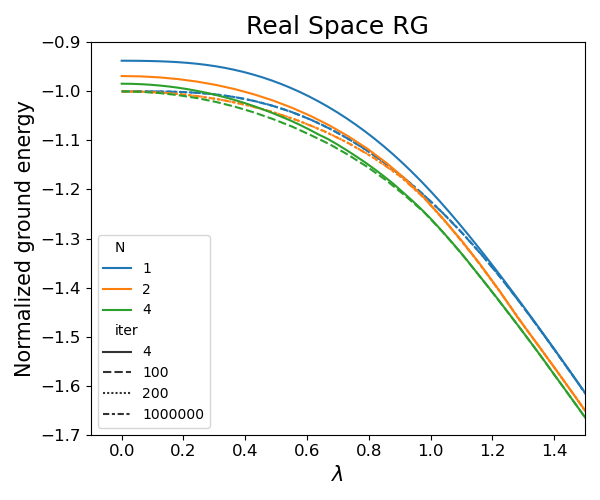

In [43]:
%matplotlib ipympl
fig, ax = plt.subplots(1, 1, figsize=(6, 5), tight_layout=True)
sns.lineplot(data=data, x='lambda', y='gs_norm', hue='N', style='iter', palette='tab10', ax = ax, lw=1.5)
ax.set_title('Real Space RG', size=18)
ax.set_xlabel(r'$\lambda$', size=15)
ax.set_ylabel('Normalized ground energy', size=15)
ax.set_xlim(-0.1, 1.5)
ax.set_ylim(-1.7, -0.9)
ax.tick_params('both', labelsize=12)


In [44]:
fig.savefig('rsrg.svg')